**INTRODUCTION**

This notebook gives a simple walkthrough of the Natural Language Toolkit (NLTK), an open-source Python library for text analysis. For this first section, make sure you have downloaded "poplyrics.zip" into a folder on your computer that you can easily access.

Running this notebook is very straightforward. Each snippet of code is separated into a "cell," which must be run individually by clicking on the little "play" icon in the top-left corner of that cell. Before each cell, there are instructions that explain what that cell does.

Make sure not to skip any cells, as some of the later cells depend on code from earlier cells. If you close the notebook and re-open it later, you will need to run each cell in order again.

**PART ONE: NLTK**

First, we have to "import" a few special Python libraries that we'll be using for this assignment, including NLTK.

In [ ]:
import nltk
import os, string, json
from google.colab import files
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

All of the processes that get run in a Google Colab notebook happen on a Google cloud server rather than your own computer. This means that any text files we want to work with have to be uploaded to that cloud server before they can be used.

When you run the next cell, a little button will appear that prompts you to upload a file. Upload "poplyrics.zip." Make sure to upload the actual zip file rather than the unzipped contents. Depending on the speed of your Internet connection, this may take anywhere from 5 seconds to a couple minutes.

In [ ]:
files.upload()

This next cell just unzips the folder so we can access the lyrics inside.

In [ ]:
!unzip poplyrics.zip

Now run this cell, which prepares the text for processing, by reading the file, forcing characters to lowercase, and stripping punctuation.

In [ ]:
plain_texts = []
for file in os.scandir():
    if file.name.endswith('.txt'):
        with open(file.path, 'r') as txtfile:
            name = file.name.split('.')[0]
            text = ''.join(c.lower() for c in txtfile.read() if c not in string.punctuation)
            plain_texts.append((name, text))

Next, we will "tokenize" the text, which is the process of splitting the text into individual words ("tokens"). NLTK has a built-in method for doing this, which relies on spaces and new line characters.

In [ ]:
from nltk import Text, word_tokenize
texts = [(name, Text(word_tokenize(txt))) for (name, txt) in plain_texts]

Now let's see what we're working with. The following cell prints out the names of each of the lyrics in our collection, as well as a numerical identifier for that set of lyrics.

In [ ]:
for i, text in enumerate(texts):
    print(i, text[0])

0 nirvana
1 bob-dylan
2 eminem
3 bjork
4 blink-182
5 Kanye_West
6 johnny-cash
7 janisjoplin
8 lorde
9 notorious-big
10 drake
11 notorious_big
12 cake
13 dr-seuss
14 nickelback
15 michael-jackson
16 leonard-cohen
17 paul-simon
18 beatles
19 lin-manuel-miranda
20 alicia-keys
21 nicki-minaj
22 bieber
23 lil-wayne
24 disney
25 prince
26 adele
27 al-green
28 radiohead
29 missy-elliott
30 kanye-west
31 jimi-hendrix
32 patti-smith
33 nursery_rhymes
34 britney-spears
35 rihanna
36 bruno-mars
37 joni-mitchell
38 ludacris
39 bob-marley
40 dickinson
41 amy-winehouse
42 bruce-springsteen
43 r-kelly
44 dolly-parton
45 lady-gaga
46 Lil_Wayne
47 kanye
48 dj-khaled


Let's see if we can find a way to visualize what makes the lyrics of each of these artists distinctive. One simple way to do this is to just see which words a given artist uses more frequently than other artists.

In order to get such a statistic, we'll need to know how much each word is used on average throughout the entire corpus. That is, we'll calculate the amount that we would expect every word to be used in a hypothetical world in which all artists used words at exactly the same rate. 

Of course, it would be really bizarre if that hypotethical world were real. This is just a thought experiment that allows us to quantify how much more frequently an artist uses a given word than average. 

In [ ]:
from nltk import FreqDist

agg_texts = word_tokenize(''.join([text for (title, text) in plain_texts]))
agg_freq = FreqDist(agg_texts)
exp_freq = {word: value / len(agg_texts) for (word, value) in agg_freq.items()}

Now, using the numberical identifiers from above, pick an artist whose lyrics you would like to examine more closely. You can do this by editing the "selection = 26" statement with the number that corresponds to your chosen artist.

In [ ]:
selection = 33 
my_text = texts[selection][1]

Alright, now let's find the words that diverge the most from the expected value. That is, these are the words that the artist uses more often than the average for all our artists.

We also remove common function words like "the" and "and," which are sometimes called "stopwords." This is not strictly necessary; sometimes you'll find that some texts use "the" more often than others, and this might be interesting. For this assignment, however, we'll strip out those boring words.

In [ ]:
my_freq = {word: value / len(my_text) for (word, value) in FreqDist(my_text).items()}
divergences = [(word, my_freq[word] - exp_freq[word]) if word in my_freq else (word, 0 - exp_freq[word]) for word in exp_freq]
divergences = sorted(divergences, key = lambda x: x[1], reverse=True)
divergences = [(word, round(value, 8)) for (word, value) in divergences if word not in nltk.corpus.stopwords.words('english')]

The following cell prints out the words that scored highest from this method. By default, it prints out the top 50, but you can print out more or fewer by editing the "number_to_show = 50" statement. 

If the printed words are cluttering your screen, you can clear out the print statement by clicking on the "X" in the output cell, which will appear if you hover your mouse underneath the "run cell" button.

In [ ]:
number_to_show = 50
divergences[:number_to_show]

[('little', 0.01053155),
 ('went', 0.0039758),
 ('old', 0.0037476),
 ('says', 0.00328474),
 ('dog', 0.00284207),
 ('shall', 0.00278766),
 ('jack', 0.0025943),
 ('rowley', 0.00247087),
 ('came', 0.0023799),
 ('three', 0.00232573),
 ('pig', 0.00227524),
 ('sing', 0.00211974),
 ('said', 0.00209798),
 ('cat', 0.00205016),
 ('wont', 0.00200068),
 ('cow', 0.00181711),
 ('two', 0.00180988),
 ('made', 0.00176136),
 ('mother', 0.00169853),
 ('lady', 0.00168676),
 ('heigho', 0.00164725),
 ('water', 0.00155805),
 ('began', 0.00155308),
 ('rat', 0.00154498),
 ('merry', 0.00151486),
 ('woman', 0.00150278),
 ('sat', 0.001481),
 ('house', 0.00141672),
 ('robin', 0.00139205),
 ('mouse', 0.00132071),
 ('away', 0.00131956),
 ('stick', 0.0012993),
 ('heigh', 0.00129426),
 ('may', 0.00127409),
 ('upon', 0.00122937),
 ('ho', 0.0012036),
 ('ate', 0.0012001),
 ('cock', 0.00119348),
 ('ran', 0.00119194),
 ('pretty', 0.00119103),
 ('fire', 0.00114379),
 ('wife', 0.00114268),
 ('poor', 0.00110226),
 ('king', 0.

Now that we've discovered some "distinctive" words for our artist, let's investigate them more closely. The following cell prints out the "concordances" of a word, which refers to the contextual usage of that word.

Select your word by altering the "word = " statement of the following cell. make sure to wrap your word in quotation marks. You can change the number of concordances to show by editing the "lines = 25" statement and you can change the "width" of the concordance by changing the "window = 80" statement.



In [ ]:
window = 80
lines = 25
word = "little"
my_text.concordance(word, width=window, lines=lines)

Displaying 25 of 200 matches:
nie lamb you shall get a fishie on a little dishie you shall get a fishie when t
 could not fail because he had got a little salt to put upon his tail he went to
to ride a spotted cow that had got a little calf she threw him down upon the gro
 i shall have a good dinner like you little jack horner little jack horner sat i
d dinner like you little jack horner little jack horner sat in a corner eating o
ood boy was i the wooing there was a little man who wooed a little maid and he s
g there was a little man who wooed a little maid and he said little maid will yo
 who wooed a little maid and he said little maid will you wed wed wed i have lit
tle maid will you wed wed wed i have little more to say so will you ay or nay fo
d is soonest mended ded ded then the little maid replied should i be your little
little maid replied should i be your little bride pray what must we have for to 
n light a fire in the kitchen or the little god of love turn the spit spit spit

Another common bit of information you may want to browse are the text's "collocations," which is a concept from linguistics that refers to words that commonly appear next to each other. For example, "New York" is likely to appear as a collocation for any corpus that talks about the state or the city of New York. 

You can change the number of collocations to display by changing the "number" field.

In [ ]:
number = 20
my_text.collocations(num=number)

heigho says; old woman; powley gammon; spinach heigho; anthony rowley;
rowley powley; says anthony; came back; haw hum; home tonight; riddle
lol; jack built; says rowley; shant get; carrion crow; lady lee;
simple simon; wang waddle; wing wang; dance oer


Another interesting statistic when investigating an individual word is the word's "distributional similarity." This refers to words that are likely to occur in similar contexts. It is inspired by what is called the "distributional hypothesis" in linguistics, or the idea that words that are used in similar contexts tend to have similar meanings. 

We'll talk more about the distributional hypothesis later in the quarter. The following cell lets you select a word to compare contextually.

In [ ]:
word = "little"
my_text.similar(word, num=20)

good penny cow wild poor shoe pretty young crooked wife the queen no
coatie man any dickybird tail calf whale


**Reflection**

Pick one of the artists from the poplyrics dataset. Produce a list of the most “distinctive” words for that artist. Then, write a “close reading” of this set of words that speculates about what they tell you about their style. It may help to use the concordance and similarity functions from NLTK to get a better grasp of how they are used in context. Optionally, you might see how this artist’s distinctive words compare to those of other artists.



**PART TWO: SEMANTIC COHORTS**

In the remainder of this notebook, we are going to explore the concept of a "semantic cohort" from the Heuser and Le Khac reading. Instead of novels, we're going to use popular song lyrics from 1960 to 2017.

First, upload the file "millionsongdata.json," a dataset of word counts from the [Million Song Dataset](http://www.thegrammarlab.com/?nor-portfolio=song-lyrics-data-tables).

In [ ]:
files.upload()

In the next cell, we'll read the data. Instead of plain text, this time we'll be working with word-counts, since the creators of the Million Song Dataset already did that work for us. The data contains a list of the number of times the word appears per million words in our corpus, for each half-decade between 1960 and 2017. So the first item is the number of times it appears per million words between 1960 and 1965, the second between 1965 and 1970, and so on.

The cell prints out the numbers for "love" as an example.

In [ ]:
with open('millionsongdata.json', 'r') as jsonfile:
    data = json.load(jsonfile)
data['love']

[10931.63,
 8114.901999999999,
 7807.541999999998,
 8156.978,
 7493.709999999999,
 7563.395999999999,
 7064.946000000001,
 5964.828,
 5362.965999999999,
 5036.629999999999,
 6607.312,
 8194.74]

What words are in our dataset? The following cell prints out the total number of words we can consider: 2987. Then, you can check to see if a specific word is present. If you change test_word to a word that is not present in the data, the cell will give you an error.

In [ ]:
test_word = "love"

print('Total number of words: ', len(data))
try:
    data[test_word]
    print(f'Yes, "{test_word}" is present in the data.')
except KeyError:
    print(f'Error: "{test_word}" is not present in the data.')

Total number of words:  2987
Yes, "love" is present in the data.


In the Heuser and Le Khac reading, they defined a semantic cohort as a group of words that rise and fall in usage together in a specific corpus. Though they may not be synonyms, the fact that their usage moves in tandem implies that they are used to talk about similar topics or related concepts.

How do we locate a semantic cohort? In their article, they calculated the correlation with every single word in their corpus with every other word. That would take a long time to compute, so we're only going to calculate that correlation for a single word at a time.

Based either on your own curiosity or on words that you noticed in Part One, select a "seed" word in the field below. Run the cell to generate a cohort of correlated words. If you get an error, try a different word - not all words are present in the dataset.



In [ ]:
from scipy.stats import zscore, pearsonr

seed = "love"
query_dict = {}
X = zscore(data[seed])
for word in data:
    Y = zscore(data[word])
    r = pearsonr(X, Y)[0]
    query_dict[word] = r

The following cell displays the top 20 words most correlated with your seed word and saves those as your "semantic cohort." Feel free to adjust the "num_to_include" value to include more or fewer words, depending on the intelligibility of the words you find.

In [ ]:
num_to_include = 20
query_sorted = sorted(query_dict.items(), key=lambda item: item[1], reverse=True)
cohort = query_sorted[:num_to_include]
cohort

[('love', 1.0),
 ('him', 0.9539192473021315),
 ('affair', 0.9335622701571187),
 ('sixteen', 0.9222057060848136),
 ('she', 0.9212676380630078),
 ('guitar', 0.9190609770442514),
 ('married', 0.9164862569610915),
 ('sidewalk', 0.9115931622313285),
 ('honey', 0.9096028204200005),
 ('thrill', 0.9062419386583745),
 ('boogie', 0.9010050914069694),
 ('women', 0.8987285373216072),
 ('peak', 0.8954317115416272),
 ('fellow', 0.8947032401350684),
 ('he', 0.8944083012209761),
 ('train', 0.8942425777503251),
 ('gold', 0.88958118057808),
 ('instrumental', 0.8888040908059868),
 ('linda', 0.8849473319580257),
 ('cafe', 0.8844958360468869)]

Now that we've produced a semantic cohort, let's make a simple plot of its behavior over time. The following cell generates a basic scatterplot that shows the relative frequencies of every word in your cohort from 1960 to 2017. 

Note that the y-axis is scaled in standard deviations rather than the actual per-million counts. This means that you are looking at the relative change of the word usage rather than it's absolute change. 

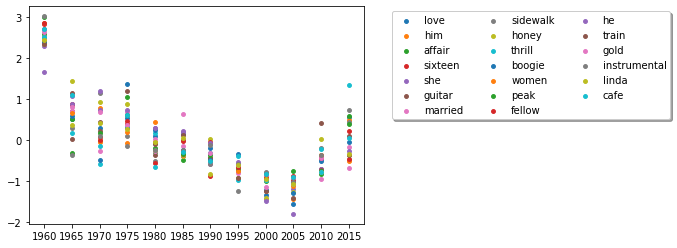

In [ ]:
import matplotlib.pyplot as plt

years = ['1960', '1965', '1970', 
         '1975', '1980', '1985', 
         '1990', '1995', '2000', 
         '2005', '2010', '2015']

fig = plt.figure()
ax1 = fig.add_subplot(111)

for word in cohort:

    ax1.scatter(years, zscore(data[word[0]]), s=15, label=word[0])

ax1.legend(loc='upper center', bbox_to_anchor=(1.5, 1.00),
          ncol=3, fancybox=True, shadow=True)
plt.show()

**Reflection**

Find a “seed” word that produces an interesting set of correlated words. You might use a word from Part One, a word from the article we read on pop lyrics, or you might simply try different words until you find something interesting. Then, write a reflection on this semantic cohort and its trend line over time. What is the logic that “binds” these words together, if any? What does the trend line tell you about the history of pop as catalogued by this corpus?